#  Introduction

Here is a brief overview of the course:

<img class="hidden dark:block" src="https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/summary-dark.svg" alt="Brief overview of the chapters of the course.">

- Chapters 1 to 4 provide an introduction to the main concepts of the 🤗 Transformers library. By the end of this part of the course, you will be familiar with how Transformer models work and will know how to use a model from the [Hugging Face Hub](https://huggingface.co/models), fine-tune it on a dataset, and share your results on the Hub!
    
- Chapters 5 to 8 teach the basics of 🤗 Datasets and 🤗 Tokenizers before diving into classic NLP tasks. By the end of this part, you will be able to tackle the most common NLP problems by yourself.
    
- Chapters 9 to 12 go beyond NLP, and explore how Transformer models can be used to tackle tasks in speech processing and computer vision. Along the way, you’ll learn how to build and share demos of your models, and optimize them for production environments. By the end of this part, you will be ready to apply 🤗 Transformers to (almost) any machine learning problem!

---
---

# Natural Language Processing

## What is NLP?

NLP is a field of linguistics and machine learning focused on understanding everything related to human language. The aim of NLP tasks is not only to understand single words individually, but to be able to understand the context of those words.

The following is a list of common NLP tasks, with some examples of each:

- **Classifying whole sentences**: Getting the sentiment of a review, detecting if an email is spam, determining if a sentence is grammatically correct or whether two sentences are logically related or not
    
- **Classifying each word in a sentence**: Identifying the grammatical components of a sentence (noun, verb, adjective), or the named entities (person, location, organization)
    
- **Generating text content**: Completing a prompt with auto-generated text, filling in the blanks in a text with masked words
    
- **Extracting an answer from a text**: Given a question and a context, extracting the answer to the question based on the information provided in the context
    
- **Generating a new sentence from an input text**: Translating a text into another language, summarizing a text

NLP isn’t limited to written text though. It also tackles complex challenges in speech recognition and computer vision, such as generating a transcript of an audio sample or a description of an image.

## Why is it challenging?

Computers don’t process information in the same way as humans. For example, when we read the sentence “I am hungry,” we can easily understand its meaning. Similarly, given two sentences such as “I am hungry” and “I am sad,” we’re able to easily determine how similar they are. For machine learning (ML) models, such tasks are more difficult. The text needs to be processed in a way that enables the model to learn from it. And because language is complex, we need to think carefully about how this processing must be done. There has been a lot of research done on how to represent text, and we will look at some methods in the next chapter.

---
---

# Transformers, what can they do?

## Transformers are everywhere!

Transformer models are used to solve all kinds of NLP tasks, like the ones mentioned in the previous section. Here are some of the companies and organizations using Hugging Face and Transformer models, who also contribute back to the community by sharing their models:

<img src="https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/companies.PNG" alt="Companies using Hugging Face" width="100%">

## `pipeline`

Some of the Currently [available pipelines](https://huggingface.co/transformers/main_classes/pipelines.html)

- feature-extraction (get the vector representation of a text)
- fill-mask
- ner (named entity recognition)
- question-answering
- sentiment-analysis
- summarization
- text-generation
- translation
- zero-shot-classification

By default, this pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English. The model is downloaded and cached when you create the classifier object. If you rerun the command, the cached model will be used instead and there is no need to download the model again.

There are three main steps involved when you pass some text to a pipeline:

- The text is `preprocessed` into a format the model can understand.
- The `preprocessed inputs are passed to the model`.
- The predictions of the model are` post-processed`, so you can make sense of them.

In [1]:
from transformers import pipeline

### Classification


In [ ]:
classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

<blockquote>

`[{'label': 'POSITIVE', 'score': 0.9598047137260437}]`

</blockquote>

We can even pass several sentences!

In [ ]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

<blockquote>

`[{'label': 'POSITIVE', 'score': 0.9598047137260437},`

` {'label': 'NEGATIVE', 'score': 0.9994558095932007}]`

</blockquote>

### Zero-shot classification

We’ll start by tackling a more challenging task where we need to classify texts that haven’t been labelled. This is a common scenario in real-world projects because annotating text is usually time-consuming and requires domain expertise. For this use case, the zero-shot-classification pipeline is very powerful: it allows you to specify which labels to use for the classification, so you don’t have to rely on the labels of the pretrained model. You’ve already seen how the model can classify a sentence as positive or negative using those two labels — but it can also classify the text using any other set of labels you like.

In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

This pipeline is called `zero-shot` because you don’t need to fine-tune the model on your data to use it. It can directly return probability scores for any list of labels you want!

### Text Generation

Now let’s see how to use a pipeline to generate some text. The main idea here is that you provide a prompt and the model will auto-complete it by generating the remaining text. This is similar to the predictive text feature that is found on many phones. Text generation involves randomness, so it’s normal if you don’t get the same results as shown below.

In [ ]:
generator = pipeline("text-generation")
generator("In this course, we will teach you how to", 
          pad_token_id=generator.tokenizer.eos_token_id,
          max_length=30,
          num_return_sequences=2,
          )


`[{'generated_text': 'In this course, we will teach you how to understand and use ' `

`'data flow and data interchange when handling user data. We '`

`'will be working with one or more of the most commonly used '`
                    
`'data flows — data flows of various types, as seen by the '`

`'HTTP'}]`

You can control how many different sequences are generated with the argument `num_return_sequences` and the total length of the output text with the argument `max_length`.

### The Inference API


All the models can be tested directly through your browser using the Inference API, which is available on the Hugging Face [website](https://huggingface.co/). You can play with the model directly on this page by inputting custom text and watching the model process the input data.


###  Mask filling

The next pipeline you’ll try is fill-mask. The idea of this task is to fill in the blanks in a given text:

In [ ]:
unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

<blockquote>

```
[{'sequence': 'This course will teach you all about mathematical models.',
'score': 0.19619831442832947,
'token': 30412,
'token_str': ' mathematical'},
{'sequence': 'This course will teach you all about computational models.',
'score': 0.04052725434303284,
'token': 38163,
'token_str': ' computational'}]
```

</blockquote>

The `top_k` argument controls how many possibilities you want to be displayed. Note that here the model fills in the special <mask> word, which is often referred to as a mask token. Other mask-filling models might have different mask tokens, so it’s always good to verify the proper mask word when exploring other models. One way to check it is by looking at the mask word used in the widget.

### Named entity recognition

Named entity recognition (NER) is a task where the model has to find which parts of the input text correspond to entities such as persons, locations, or organizations. Let’s look at an example:

In [ ]:
ner = pipeline("ner", aggregation_strategy="simple")
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

<blockquote>

```
[{'entity_group': 'PER', 'score': 0.99816, 'word': 'Sylvain', 'start': 11, 'end': 18}, 
 {'entity_group': 'ORG', 'score': 0.97960, 'word': 'Hugging Face', 'start': 33, 'end': 45}, 
 {'entity_group': 'LOC', 'score': 0.99321, 'word': 'Brooklyn', 'start': 49, 'end': 57}
]
```
</blockquote>

We pass the option `aggregation_strategy="simple"` in the pipeline creation function to tell the pipeline to aggregate together the parts of the sentence that correspond to the same entity: here the model correctly grouped “Hugging” and “Face” as a single organization, even though the name consists of multiple words. In fact, as we will see in the next chapter, the preprocessing even splits some words into smaller parts. For instance, Sylvain is split into four pieces: S, ##yl, ##va, and ##in. In the post-processing step, the pipeline successfully regrouped those pieces.

###  Question answering

The question-answering pipeline answers questions using information from a given context:



In [ ]:
question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

<blockquote>

`{'score': 0.6385916471481323, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}`

</blockquote>

Note that this pipeline works by extracting information from the provided context; it does not generate the answer.

###  Summarization

Summarization is the task of reducing a text into a shorter text while keeping all (or most) of the important aspects referenced in the text. Here’s an example:


In [ ]:
summarizer = pipeline("summarization")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of 
    graduates in traditional engineering disciplines such as mechanical, civil, 
    electrical, chemical, and aeronautical engineering declined, but in most of 
    the premier American universities engineering curricula now concentrate on 
    and encourage largely the study of engineering science. As a result, there 
    are declining offerings in engineering subjects dealing with infrastructure, 
    the environment, and related issues, and greater concentration on high 
    technology subjects, largely supporting increasingly complex scientific 
    developments. While the latter is important, it should not be at the expense 
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other 
    industrial countries in Europe and Asia, continue to encourage and advance 
    the teaching of engineering. Both China and India, respectively, graduate 
    six and eight times as many traditional engineers as does the United States. 
    Other industrial countries at minimum maintain their output, while America 
    suffers an increasingly serious decline in the number of engineering graduates 
    and a lack of well-educated engineers.
"""
)



<blockquote>

```
[{'summary_text': ' America has changed dramatically during recent years . The '
'number of engineering graduates in the U.S. has declined in '
'traditional engineering disciplines such as mechanical, civil '
', electrical, chemical, and aeronautical engineering . Rapidly '
'developing economies such as China and India, as well as other '
'industrial countries in Europe and Asia, continue to encourage '
'and advance engineering .'}]
```


</blockquote>

###  Translation

For translation, you can use a default model if you provide a language pair in the task name (such as "translation_en_to_fr"), but the easiest way is to pick the model you want to use on the Model Hub. Here we’ll try translating from French to English:

In [ ]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

<blockquote>

`[{'translation_text': 'This course is produced by Hugging Face.'}]`

</blockquote>

Like with text generation and summarization, you can specify a max_length or a min_length for the result.

# How do Transformers work?

## A bit of Transformer history

Here are some reference points in the (short) history of Transformer models:

<img class="hidden dark:block" src="https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/transformers_chrono-dark.svg" alt="A brief chronology of Transformers models.">

The [Transformer architecture](https://arxiv.org/abs/1706.03762) was introduced in June 2017. The focus of the original research was on translation tasks. This was followed by the introduction of several influential models, including:

- June 2018: [GPT](https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf), the first pretrained Transformer model, used for fine-tuning on various NLP tasks and obtained state-of-the-art results
- October 2018: [BERT](https://arxiv.org/abs/1810.04805), another large pretrained model, this one designed to produce better summaries of sentences (more on this in the next chapter!)
- February 2019: [GPT-2](https://arxiv.org/abs/1910.01108), an improved (and bigger) version of GPT that was not immediately publicly released due to ethical concerns
- October 2019: [DistilBERT](https://arxiv.org/abs/1910.01108), a distilled version of BERT that is 60% faster, 40% lighter in memory, and still retains 97% of BERT’s performance
- October 2019: [BART](https://arxiv.org/abs/1910.13461) and [T5](https://arxiv.org/abs/1910.10683), two large pretrained models using the same architecture as the original Transformer model (the first to do so)
- May 2020, [GPT-3](https://arxiv.org/abs/2005.14165), an even bigger version of GPT-2 that is able to perform well on a variety of tasks without the need for fine-tuning (called zero-shot learning)


This list is far from comprehensive, and is just meant to highlight a few of the different kinds of Transformer models. Broadly, they can be grouped into three categories:

    GPT-like (also called auto-regressive Transformer models)
    BERT-like (also called auto-encoding Transformer models)
    BART/T5-like (also called sequence-to-sequence Transformer models)



## Transformers are language models

All the Transformer models mentioned above (GPT, BERT, BART, T5, etc.) have been trained as language models. This means they have been trained on large amounts of raw text in a self-supervised fashion. Self-supervised learning is a type of training in which the objective is automatically computed from the inputs of the model. That means that humans are not needed to label the data!

This type of model develops a statistical understanding of the language it has been trained on, but it’s not very useful for specific practical tasks. Because of this, the general pretrained model then goes through a process called transfer learning. During this process, the model is fine-tuned in a supervised way — that is, using human-annotated labels — on a given task.

An example of a task is predicting the next word in a sentence having read the n previous words. This is called causal language modeling because the output depends on the past and present inputs, but not the future ones.

<img class="hidden dark:block" src="https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/causal_modeling-dark.svg" alt="Example of causal language modeling in which the next word from a sentence is predicted.">

Another example is masked language modeling, in which the model predicts a masked word in the sentence.

<img class="hidden dark:block" src="https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/masked_modeling-dark.svg" alt="Example of masked language modeling in which a masked word from a sentence is predicted.">



## Transformers are big models

Apart from a few outliers (like DistilBERT), the general strategy to achieve better performance is by increasing the models’ sizes as well as the amount of data they are pretrained on.

<img src="https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/model_parameters.png" alt="Number of parameters of recent Transformers models" width="90%">

Unfortunately, training a model, especially a large one, requires a large amount of data. This becomes very costly in terms of time and compute resources. It even translates to environmental impact, as can be seen in the following graph.
The carbon footprint of a large language model.

<img class="hidden dark:block" src="https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/carbon_footprint-dark.svg" alt="The carbon footprint of a large language model.">

And this is showing a project for a (very big) model led by a team consciously trying to reduce the environmental impact of pretraining. The footprint of running lots of trials to get the best hyperparameters would be even higher.

Imagine if each time a research team, a student organization, or a company wanted to train a model, it did so from scratch. This would lead to huge, unnecessary global costs!

This is why sharing language models is paramount: sharing the trained weights and building on top of already trained weights reduces the overall compute cost and carbon footprint of the community.

By the way, you can evaluate the carbon footprint of your models’ training through several tools. For example [ML CO2 Impact](https://mlco2.github.io/impact/) or [Code Carbon](https://codecarbon.io/) which is integrated in 🤗 Transformers. To learn more about this, you can read this [blog post](https://huggingface.co/blog/carbon-emissions-on-the-hub) which will show you how to generate an emissions.csv file with an estimate of the footprint of your training, as well as the [documentation](https://huggingface.co/docs/hub/model-cards-co2) of 🤗 Transformers addressing this topic.

##  Transfer Learning

`Pretraining` is the act of training a model from scratch: the weights are randomly initialized, and the training starts without any prior knowledge.

<div class="flex justify-center"> <img class="hidden dark:block" src="https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/pretraining-dark.svg" alt="The pretraining of a language model is costly in both time and money."></div>

This pretraining is usually done on very large amounts of data. Therefore, it requires a very large corpus of data, and training can take up to several weeks.

`Fine-tuning`, on the other hand, is the training done after a model has been pretrained. To perform fine-tuning, you first acquire a pretrained language model, then perform additional training with a dataset specific to your task. Wait — why not simply train directly for the final task? There are a couple of reasons:


- The pretrained model was already trained on a dataset that has some similarities with the fine-tuning dataset. The fine-tuning process is thus able to take advantage of knowledge acquired by the initial model during pretraining (for instance, with NLP problems, the pretrained model will have some kind of statistical understanding of the language you are using for your task).
- Since the pretrained model was already trained on lots of data, the fine-tuning requires way less data to get decent results.
- For the same reason, the amount of time and resources needed to get good results are much lower.

For example, one could leverage a pretrained model trained on the English language and then fine-tune it on an arXiv corpus, resulting in a science/research-based model. The fine-tuning will only require a limited amount of data: the knowledge the pretrained model has acquired is “transferred,” hence the term `transfer learning`.

<img class="hidden dark:block" src="https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/finetuning-dark.svg" alt="The fine-tuning of a language model is cheaper than pretraining in both time and money.">

Fine-tuning a model therefore has lower time, data, financial, and environmental costs. It is also quicker and easier to iterate over different fine-tuning schemes, as the training is less constraining than a full pretraining.

This process will also achieve better results than training from scratch (unless you have lots of data), which is why you should always try to leverage a pretrained model — one as close as possible to the task you have at hand — and fine-tune it.

## General architecture

###  Introduction

The model is primarily composed of two blocks:

- **Encoder (left)**: The encoder receives an input and builds a representation of it (its features). This means that the model is optimized to acquire understanding from the input.
- **Decoder (right)**: The decoder uses the encoder’s representation (features) along with other inputs to generate a target sequence. This means that the model is optimized for generating outputs.

Architecture of a Transformers models

<img class="hidden dark:block" src="https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/transformers_blocks-dark.svg" alt="Architecture of a Transformers models">

Each of these parts can be used independently, depending on the task:

- **Encoder-only models**: Good for tasks that require understanding of the input, such as sentence classification and named entity recognition.
- **Decoder-only models**: Good for generative tasks such as text generation.
- **Encoder-decoder models or sequence-to-sequence models**: Good for generative tasks that require an input, such as translation or summarization.

## Attention layers

A key feature of Transformer models is that they are built with special layers called attention layers. In fact, the title of the paper introducing the Transformer architecture was “[Attention Is All You Need](https://arxiv.org/abs/1706.03762)”! We will explore the details of attention layers later in the course; for now, all you need to know is that this layer will tell the model to pay specific attention to certain words in the sentence you passed it (and more or less ignore the others) when dealing with the representation of each word.

To put this into context, consider the task of translating text from English to French. Given the input “You like this course”, a translation model will need to also attend to the adjacent word “You” to get the proper translation for the word “like”, because in French the verb “like” is conjugated differently depending on the subject. The rest of the sentence, however, is not useful for the translation of that word. In the same vein, when translating “this” the model will also need to pay attention to the word “course”, because “this” translates differently depending on whether the associated noun is masculine or feminine. Again, the other words in the sentence will not matter for the translation of “this”. With more complex sentences (and more complex grammar rules), the model would need to pay special attention to words that might appear farther away in the sentence to properly translate each word.

The same concept applies to any task associated with natural language: a word by itself has a meaning, but that meaning is deeply affected by the context, which can be any other word (or words) before or after the word being studied.


## The original architecture

The Transformer architecture was originally designed for translation. During training, the encoder receives inputs (sentences) in a certain language, while the decoder receives the same sentences in the desired target language. In the encoder, the attention layers can use all the words in a sentence (since, as we just saw, the translation of a given word can be dependent on what is after as well as before it in the sentence). The decoder, however, works sequentially and can only pay attention to the words in the sentence that it has already translated (so, only the words before the word currently being generated). For example, when we have predicted the first three words of the translated target, we give them to the decoder which then uses all the inputs of the encoder to try to predict the fourth word.

To speed things up during training (when the model has access to target sentences), the decoder is fed the whole target, but it is not allowed to use future words (if it had access to the word at position 2 when trying to predict the word at position 2, the problem would not be very hard!). For instance, when trying to predict the fourth word, the attention layer will only have access to the words in positions 1 to 3.

The original Transformer architecture looked like this, with the encoder on the left and the decoder on the right:

<img class="hidden dark:block" src="https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/transformers-dark.svg" alt="Architecture of a Transformers models">

Note that the first attention layer in a decoder block pays attention to all (past) inputs to the decoder, but the second attention layer uses the output of the encoder. It can thus access the whole input sentence to best predict the current word. This is very useful as different languages can have grammatical rules that put the words in different orders, or some context provided later in the sentence may be helpful to determine the best translation of a given word.

The `attention mask` can also be used in the encoder/decoder to prevent the model from paying attention to some special words — for instance, the special padding word used to make all the inputs the same length when batching together sentences.

## Architectures vs. checkpoints

As we dive into Transformer models in this course, you’ll see mentions of architectures and checkpoints as well as models. These terms all have slightly different meanings:

- **Architecture**: This is the skeleton of the model — the definition of each layer and each operation that happens within the model.
- **Checkpoints**: These are the weights that will be loaded in a given architecture.
- **Model**: This is an umbrella term that isn’t as precise as “architecture” or “checkpoint”: it can mean both. This course will specify architecture or checkpoint when it matters to reduce ambiguity.

For example, BERT is an architecture while bert-base-cased, a set of weights trained by the Google team for the first release of BERT, is a checkpoint. However, one can say “the BERT model” and “the bert-base-cased model.”

#  Encoder models

Encoder models use only the encoder of a Transformer model. At each stage, `the attention layers can access all the words in the initial sentence`. These models are often characterized as having `“bi-directional” attention`, and are often called auto-encoding models.

The pretraining of these models usually revolves around somehow corrupting a given sentence (for instance, by masking random words in it) and tasking the model with finding or reconstructing the initial sentence.

Encoder models are best suited for tasks requiring an understanding of the full sentence, such as sentence classification, named entity recognition (and more generally word classification), and extractive question answering.

Representatives of this family of models include:

- [ALBERT](https://huggingface.co/transformers/model_doc/albert.html)
- [BERT](https://huggingface.co/transformers/model_doc/bert.html)
- [DistilBERT](https://huggingface.co/transformers/model_doc/distilbert.html)
- [ELECTRA](https://huggingface.co/transformers/model_doc/electra.html)
- [RoBERTa](https://huggingface.co/transformers/model_doc/roberta.html)

# Decoder models

Decoder models use only the decoder of a Transformer model. At each stage, `for a given word the attention layers can only access the words positioned before it in the sentence`. These models are often called auto-regressive models.

The pretraining of decoder models usually revolves around predicting the next word in the sentence.

These models are best suited for tasks involving text generation.

Representatives of this family of models include:

- [CTRL](https://huggingface.co/transformers/model_doc/ctrl.html)
- [GPT](https://huggingface.co/docs/transformers/model_doc/openai-gpt)
- [GPT-2](https://huggingface.co/transformers/model_doc/gpt2.html)
- [Transformer XL](https://huggingface.co/transformers/model_doc/transfo-xl.html)

# Sequence-to-sequence models

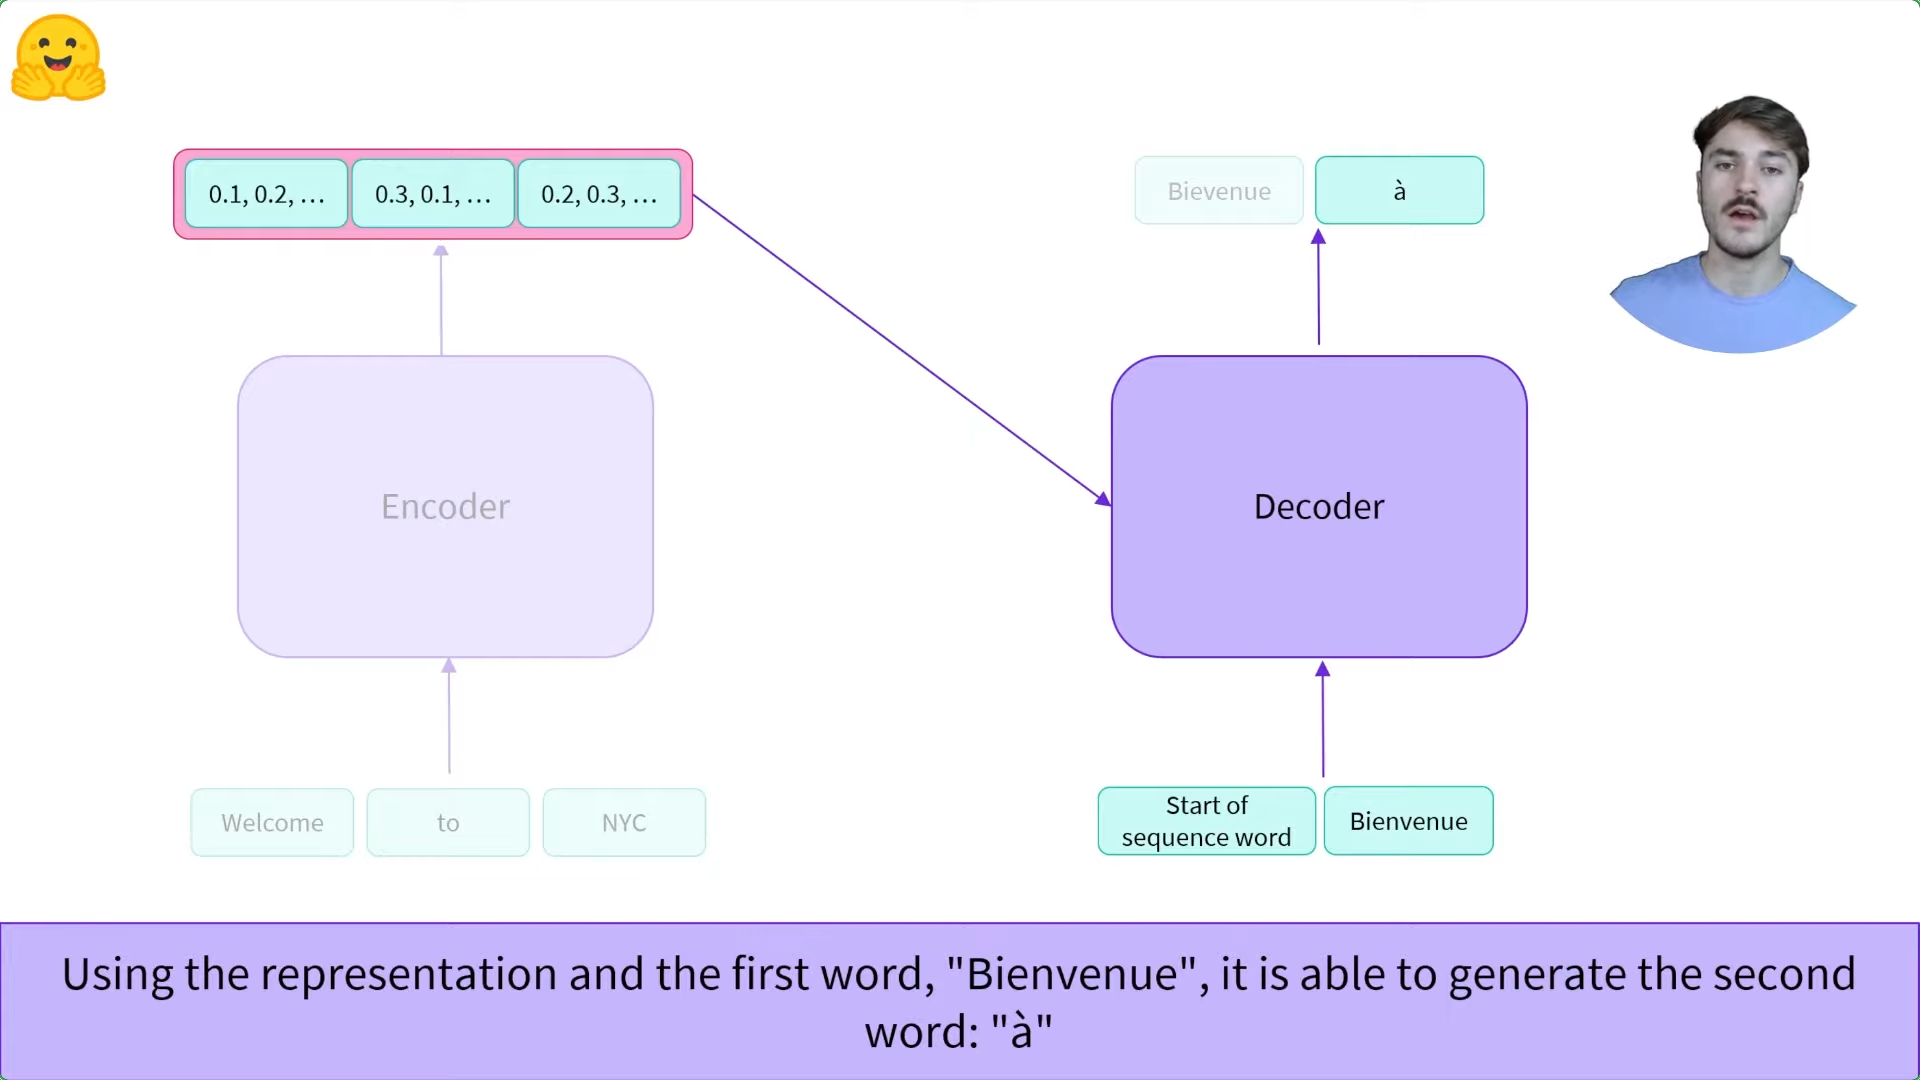

Encoder-decoder models (also called sequence-to-sequence models) use both parts of the Transformer architecture. At each stage, `the attention layers of the encoder can access all the words in the initial sentence`, whereas the `attention layers of the decoder can only access the words positioned before a given word in the input`.


The pretraining of these models can be done using the objectives of encoder or decoder models, but usually involves something a bit more complex. For instance, [T5](https://huggingface.co/transformers/model_doc/t5.html) is pretrained by replacing random spans of text (that can contain several words) with a single mask special word, and the objective is then to predict the text that this mask word replaces.

Sequence-to-sequence models are best suited for tasks revolving around generating new sentences depending on a given input, such as summarization, translation, or generative question answering.

Representatives of this family of models include:

- [BART](https://huggingface.co/transformers/model_doc/bart.html)
- [mBART](https://huggingface.co/transformers/model_doc/bart.html)
- [Marian](https://huggingface.co/transformers/model_doc/marian.html)
- [T5](https://huggingface.co/transformers/model_doc/t5.html)

# Bias and limitations

If your intent is to use a pretrained model or a fine-tuned version in production, please be aware that, while these models are powerful tools, they come with limitations. The biggest of these is that, to enable pretraining on large amounts of data, researchers often scrape all the content they can find, taking the best as well as the worst of what is available on the internet.

To give a quick illustration, let’s go back the example of a fill-mask pipeline with the BERT model:



In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
result = unmasker("This man works as a [MASK].")
print([r["token_str"] for r in result])

result = unmasker("This woman works as a [MASK].")
print([r["token_str"] for r in result])

<blockquote>

```
['lawyer', 'carpenter', 'doctor', 'waiter', 'mechanic']
['nurse', 'waitress', 'teacher', 'maid', 'prostitute']
```

</blockquote>

When asked to fill in the missing word in these two sentences, the model gives only one gender-free answer (waiter/waitress). The others are work occupations usually associated with one specific gender — and yes, prostitute ended up in the top 5 possibilities the model associates with “woman” and “work.” This happens even though BERT is one of the rare Transformer models not built by scraping data from all over the internet, but rather using apparently neutral data (it’s trained on the [English Wikipedia](https://huggingface.co/datasets/wikipedia) and [BookCorpus](https://huggingface.co/datasets/bookcorpus) datasets).

When you use these tools, you therefore need to keep in the back of your mind that the original model you are using could very easily generate sexist, racist, or homophobic content. Fine-tuning the model on your data won’t make this intrinsic bias disappear.

#  Summary

In this chapter, you saw how to approach different NLP tasks using the high-level pipeline() function from 🤗 Transformers. You also saw how to search for and use models in the Hub, as well as how to use the Inference API to test the models directly in your browser.

We discussed how Transformer models work at a high level, and talked about the importance of transfer learning and fine-tuning. A key aspect is that you can use the full architecture or only the encoder or decoder, depending on what kind of task you aim to solve. The following table summarizes this:


|Model| 	Examples| 	Tasks|
|---|---|---|
|Encoder| 	ALBERT, BERT, DistilBERT, ELECTRA, RoBERTa| 	Sentence classification, named entity recognition, extractive question answering|
|Decoder| 	CTRL, GPT, GPT-2, Transformer XL| 	Text generation|
|Encoder-decoder| 	BART, T5, Marian, mBART| 	Summarization, translation, generative question answering|
